# Mesh generator

In [1]:
import numpy as np
import numpy.linalg as LA
%matplotlib inline
from matplotlib import pyplot as plt

In [2]:
xlim = 1
ylim = 1
num_ele = 40
num_node = num_ele+1
xseed = np.linspace(-xlim, xlim, num_node).reshape(num_node,1)
yseed = np.linspace(-ylim, ylim, num_node).reshape(num_node,1)

In [3]:
coords = np.zeros((num_node**2,2))
coords[:,0] = np.tile(xseed, (num_node, 1)).flatten()

In [4]:
for i in range(num_node):
    coords[i*num_node:(i+1)*num_node,1] = yseed[i]

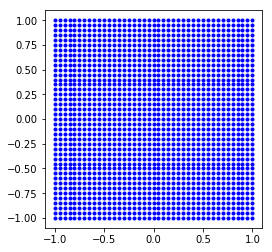

In [7]:
plt.plot(coords[:,0], coords[:,1], 'b.');
plt.gca().set_aspect('equal', adjustable='box')

In [13]:
incidence = np.zeros((num_ele**2,4))
for i in range(num_ele):
    for j in range(num_ele):
        index = (i)*num_ele+j
        incidence[index,0]=(i)*num_node+j
        incidence[index,1]=incidence[index,0]+1
        incidence[index,2]=incidence[index,1]+num_node
        incidence[index,3]=incidence[index,2]-1
        
incidence = incidence.astype(int)

In [14]:
np.save('incidence', incidence)
np.save('coordinates',coords)

In [28]:
bindex = []
x_range = list(range(12))
x_range.extend(list(range(14,27)))
x_range.extend(list(range(29,41)))
for j in [19, 20, 21]:
    bindex.extend([j * num_node + i for i in x_range])

In [31]:
B = np.zeros((coords.shape[0], 2, 2))
for i in bindex:
    B[i, 0, 1] = 2 / (2*ylim/num_ele)

In [32]:
X, Y = np.meshgrid(xseed, yseed)

In [34]:
Z = np.zeros(X.shape)
for i in range(num_node):
    for j in range(num_node):
        index = num_node*i + j
        Z[i,j] = B[index, 0, 1]

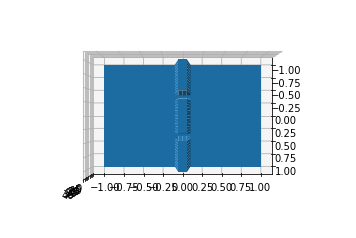

In [44]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Y, Z)
# plt.pcolor(X, Y, Z)
ax.view_init(90, 0)

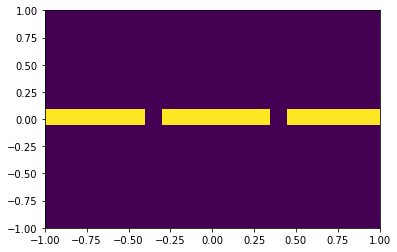

In [46]:
plt.pcolor(X,Y,Z)

In [55]:
np.save('B', B)

In [61]:
k = np.zeros(coords.shape)
k[:,1] = 1
k[coords[:,1]<0, 0] = np.cos(2*np.pi/3)
k[coords[:,1]<0, 1] = np.sin(2*np.pi/3)
k[coords[:,1]>0, 0] = -np.cos(2*np.pi/3)
k[coords[:,1]>0, 1] = np.sin(2*np.pi/3)

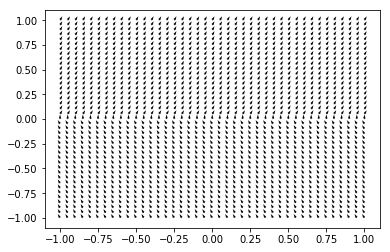

In [62]:
plt.quiver(coords[:,0], coords[:,1], k[:,0], k[:,1])

In [63]:
np.save('k',k)

In [64]:
bc = list(range(num_node))

In [65]:
bc

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40]

In [66]:
np.save('bc',bc)